In [6]:
# !wget https://cvssp.org/data/diplecs/Surrey/video.mp4
# !wget https://cvssp.org/data/diplecs/Surrey/controls_all.dat
!mv video.mp4 /data/DIPLECS/
!mv controls_all.dat /data/DIPLECS/

The system cannot find the path specified.
mv: cannot stat 'video.mp4': No such file or directory
The system cannot find the path specified.
mv: cannot stat 'controls_all.dat': No such file or directory


In [53]:
def get_capture_information(cap: cv2.VideoCapture):
    data = {}
    data['frame_count'] = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    data['frame_ptr'] = int(cap.get(cv2.CAP_PROP_POS_FRAMES))
    data['frame_width'] = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    data['frame_height'] = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    data['fps'] = cap.get(cv2.CAP_PROP_FPS)
    return data

In [58]:
# import torch
# import torchvision
import cv2

cap = cv2.VideoCapture('./data/DIPLECS/video.mp4')
info = get_capture_information(cap)
print(info)

pos_frame = info['frame_ptr']
while cap.isOpened():
    flag, frame = cap.read()
    if flag:
        # frame is ready and already captured    
        cv2.imshow('video', frame[150:675, :, :])
        pos_frame = cap.get(cv2.CAP_PROP_POS_FRAMES)
    else:
        # next frame is not ready yet
        cap.set(cv2.CAP_PROP_POS_FRAMES, pos_frame - 1)
        cv2.waitKey(1000)
        
    if (cv2.waitKey(10) == ord('q')):
        break
    if cap.get(cv2.CAP_PROP_POS_FRAMES) == cap.get(cv2.CAP_PROP_FRAME_COUNT):
        # end of frames
        break

cap.release()
cv2.destroyAllWindows()

{'frame_count': 84690, 'frame_ptr': 0, 'frame_width': 1920, 'frame_height': 1080, 'fps': 29.97002997002997}


In [59]:
import pandas as pd

df = pd.read_table('./data/DIPLECS/controls_all.dat')
df.columns = ['frame_number', 'speed', 'steering']
df.head(10)

,frame_number,speed,steering
0,2,30,0.0
1,3,30,0.0
2,4,30,0.0
3,5,30,0.0
4,6,30,0.0
5,7,30,0.0
6,8,30,0.0
7,9,30,0.0
8,10,30,0.0
9,11,30,0.0


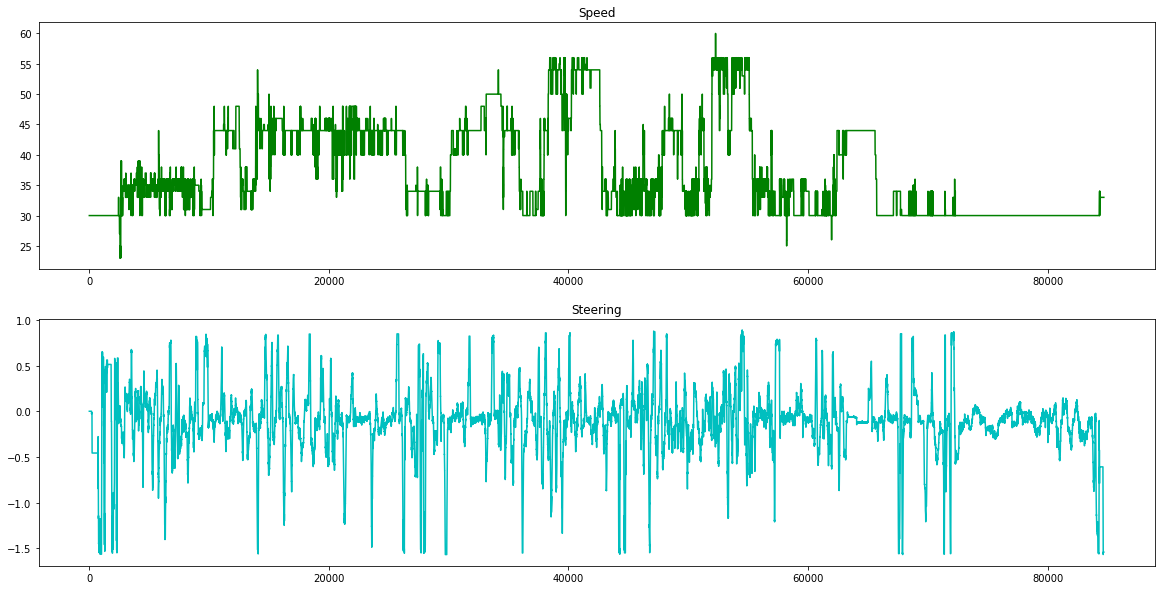

In [61]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))
ax1.plot(df['speed'], 'g')
ax1.set_title('Speed')
ax2.plot(df['steering'], 'c')
ax2.set_title('Steering')
plt.show()